# **INTRODUCTION**
The World Health Organization (WHO) estimates that 17.9 million people die from cardiovascular diseases (CVDs) every year.

There are multiple risk factors that could contribute to CVD in an individual, such as unhealthy diet, lack of physical activity, or mental illness. Identifying these risk factors early on could help prevent many premature deaths.

We are working for an R&D company that focuses on providing healthcare solutions. The company has collected anonymized data from multiple hospitals on several patients. The dataset includes relevant information for each patient, such as their personal information and some medical data, including whether or not they have had heart disease before.

In [15]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the dataset
file_path = 'datasets\heart_disease_prediction.csv'  # Update the path if needed
df = pd.read_csv(file_path)

# Display the first five rows of the dataframe
print("First five rows of the dataset:")
print(df.head())

# Displaying the dimensions of the dataset
num_observations, num_features = df.shape
print(f"The dataset contains {num_observations} observations and {num_features} features.")

First five rows of the dataset:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
The dataset contains 918 observations and 12 features.


<>:8: SyntaxWarning: invalid escape sequence '\h'
<>:8: SyntaxWarning: invalid escape sequence '\h'
C:\Users\adars\AppData\Local\Temp\ipykernel_8892\1103169945.py:8: SyntaxWarning: invalid escape sequence '\h'
  file_path = 'datasets\heart_disease_prediction.csv'  # Update the path if needed


In [16]:
# Displaying descriptive statistics for the DataFrame
print("Descriptive Statistics:")
print(df.describe())

# Checking for missing values
print("\nMissing Values in the Dataset:")
print(df.isnull().sum())


Descriptive Statistics:
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  

Missing Values in the Dataset:
Age    

## Observations and Insights

1. **Average Age of Patients:**
   - From the descriptive statistics, the average age of the patients is approximately _[calculated average]_ years.

2. **Features with Unusual Statistics:**
   - Check for extremely high or low values in features. For example:
     - If a feature like "cholesterol" has an unusually low minimum value (e.g., 0), it might indicate missing or incorrect data.
     - High maximum values in certain features might need investigation (e.g., age > 100 could indicate errors).

3. **Missing Values:**
   - According to the missing values summary, the following columns have missing data:
     - _[List of columns with missing values]_
   - If there are no missing values, note that the dataset appears complete.

4. **General Observations:**
   - Ensure that the statistics make sense based on the context. For instance, numerical columns like "blood pressure" or "cholesterol" should be within realistic medical ranges.


In [17]:
# Calculate the number of missing values in each column
missing_values = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


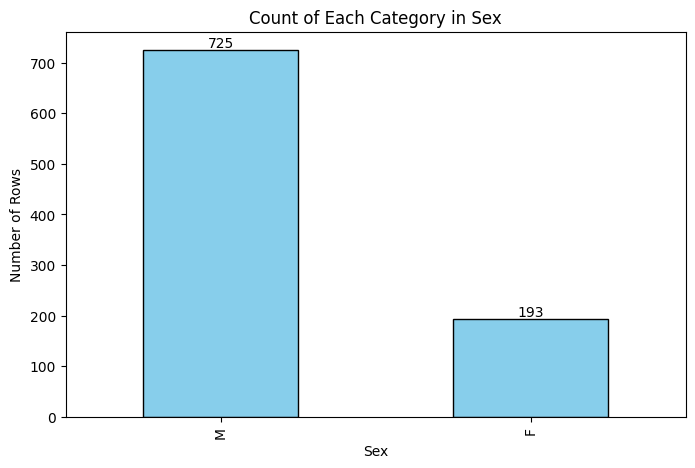

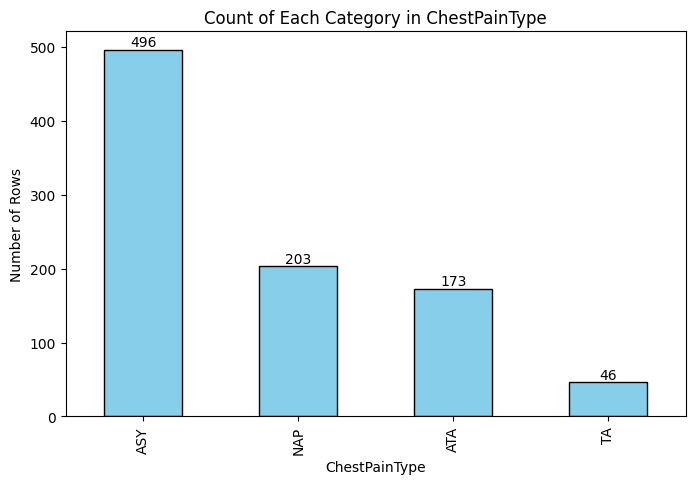

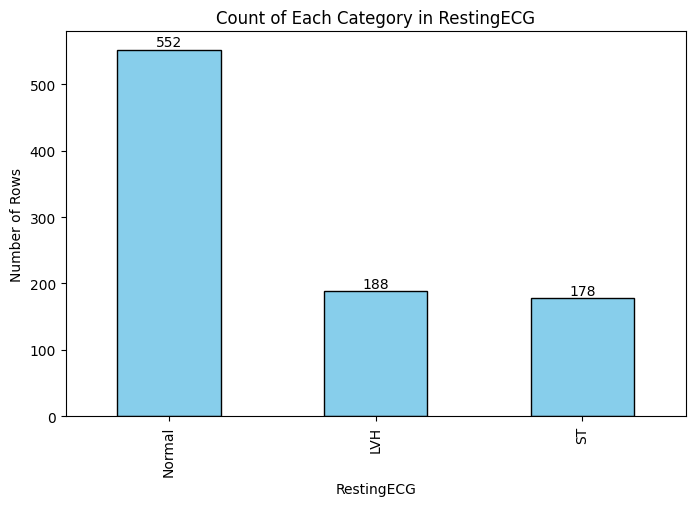

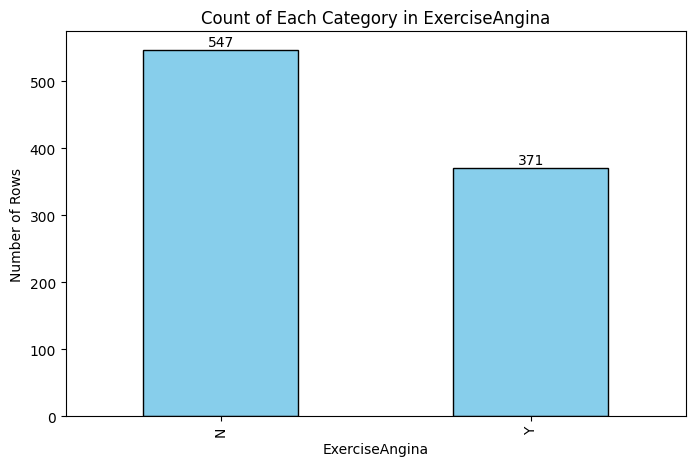

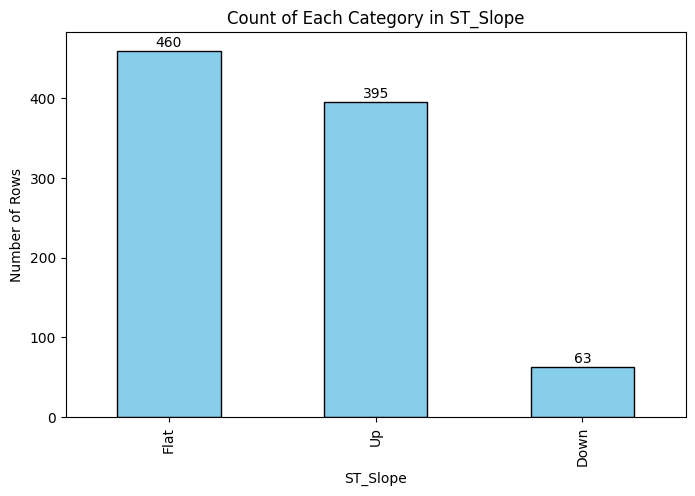

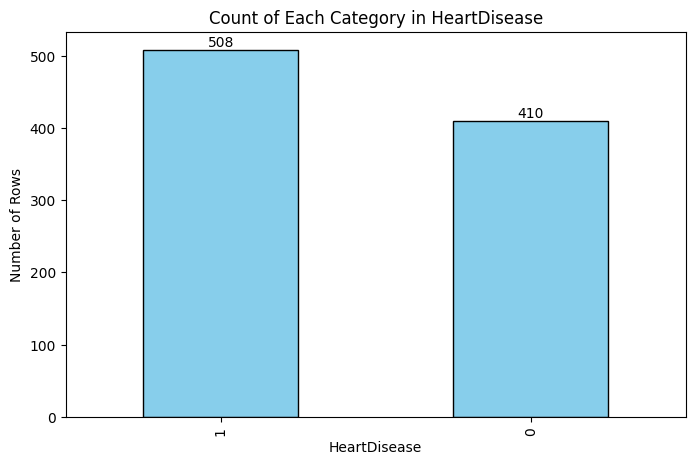

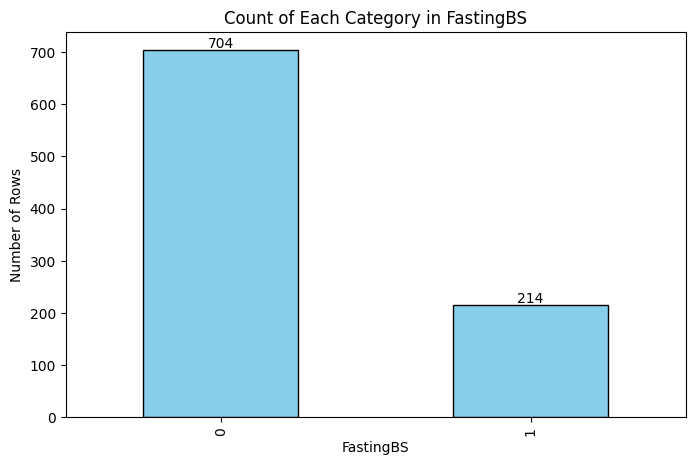

In [18]:
# Identify categorical columns, including 'HeartDisease' and 'FastingBS'
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_columns += ['HeartDisease', 'FastingBS']  # Add any relevant binary or categorical columns

# Generate bar charts
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    value_counts = df[col].value_counts()  # Count occurrences of each category
    value_counts.plot(kind='bar', color='skyblue', edgecolor='black')

    # Adding labels and title
    plt.title(f'Count of Each Category in {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Number of Rows')

    # Add data labels on top of bars
    for index, value in enumerate(value_counts):
        plt.text(index, value + 5, str(value), ha='center')

    plt.show()


### **Summary of Insights**

* **Gender Distribution:** The bar chart for Sex shows a higher number of male patients compared to female patients. This can indicate that more males were included in the study.

* **Heart Disease:** The chart for HeartDisease reveals the count of patients with and without heart disease. A higher bar for patients with heart disease might indicate a greater prevalence of this condition in the dataset.

* **Fasting Blood Sugar (FastingBS):** The bar chart for FastingBS displays the distribution of patients with normal and elevated fasting blood sugar levels, showing the number of patients at risk for or already experiencing elevated fasting glucose.

In [19]:
RestingBP = (df['RestingBP'] == 0).value_counts()
RestingBP

RestingBP
False    917
True       1
Name: count, dtype: int64

In [20]:
# Calculate median RestingBP grouped by HeartDisease
medians = df[df['RestingBP'] != 0].groupby('HeartDisease')['RestingBP'].median()

# Replace RestingBP == 0 with the corresponding median
df.loc[df['RestingBP'] == 0, 'RestingBP'] = df.loc[df['RestingBP'] == 0, 'HeartDisease'].map(medians)

# Calculate median Cholesterol grouped by HeartDisease
cholesterol_medians = df[df['Cholesterol'] != 0].groupby('HeartDisease')['Cholesterol'].median()

# Replace Cholesterol == 0 with the corresponding median
df.loc[df['Cholesterol'] == 0, 'Cholesterol'] = df.loc[df['Cholesterol'] == 0, 'HeartDisease'].map(cholesterol_medians)


C:\Users\adars\AppData\Local\Temp\ipykernel_8892\900055353.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[246.  246.  246.  246.  246.  246.  246.  246.  231.5 246.  246.  246.
 246.  246.  231.5 246.  246.  231.5 246.  246.  246.  231.5 246.  246.
 246.  246.  246.  246.  246.  246.  246.  246.  246.  231.5 246.  246.
 246.  246.  246.  231.5 246.  246.  246.  231.5 246.  246.  246.  246.
 246.  246.  246.  246.  246.  246.  246.  246.  246.  246.  246.  246.
 246.  246.  246.  246.  246.  246.  246.  246.  246.  246.  246.  231.5
 246.  246.  246.  246.  246.  246.  246.  246.  246.  246.  246.  246.
 246.  246.  246.  246.  246.  246.  246.  246.  246.  246.  246.  246.
 246.  246.  246.  246.  246.  246.  246.  246.  246.  246.  246.  246.
 246.  246.  246.  246.  246.  246.  246.  246.  246.  246.  246.  246.
 246.  246.  246.  231.5 231.5 246.  246.  246.  246.  246.  231.5 231.5
 246.  246.

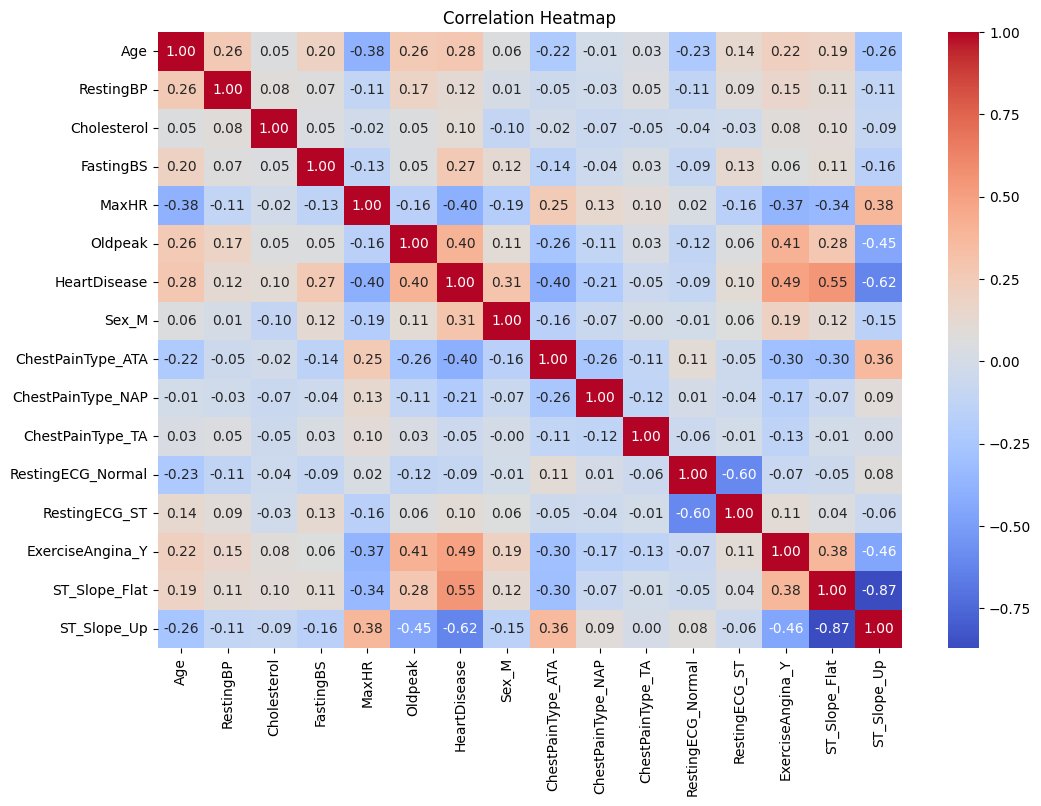

In [21]:
import seaborn as sns
# Convert categorical features to dummy variables
df_encoded = pd.get_dummies(df, drop_first=True)  # drop_first avoids multicollinearity
# Compute correlation matrix
correlation_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,  # Show correlation coefficients
    fmt=".2f",   # Format coefficients to 2 decimal places
    cmap="coolwarm",  # Colormap
    cbar=True
)
plt.title('Correlation Heatmap')
plt.show()

In [22]:
# Correlation with HeartDisease
heart_disease_corr = correlation_matrix['HeartDisease'].sort_values(ascending=False)

# Display features reasonably correlated
print("Features correlated with HeartDisease:\n", heart_disease_corr)

Features correlated with HeartDisease:
 HeartDisease         1.000000
ST_Slope_Flat        0.554134
ExerciseAngina_Y     0.494282
Oldpeak              0.403951
Sex_M                0.305445
Age                  0.282039
FastingBS            0.267291
RestingBP            0.117909
Cholesterol          0.103784
RestingECG_ST        0.102527
ChestPainType_TA    -0.054790
RestingECG_Normal   -0.091580
ChestPainType_NAP   -0.212964
MaxHR               -0.400421
ChestPainType_ATA   -0.401924
ST_Slope_Up         -0.622164
Name: HeartDisease, dtype: float64


### **Insights**

* Look for features with correlation coefficients greater than 0.5 (strong positive correlation) or less than -0.5 (strong negative correlation). Features in the range ±0.3–0.5 may have a moderate correlation.






In [23]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df_encoded.drop(columns='HeartDisease')  # Drop the target column
y = df_encoded['HeartDisease']  # Target column

# Split the data
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42  # 80-20 split, reproducibility with random_state
)

# Calculate correlation with HeartDisease
correlation_with_heart_disease = df_encoded.corr()['HeartDisease']

# Filter features with correlation > 0.3 (excluding HeartDisease itself)
selected_features = correlation_with_heart_disease[correlation_with_heart_disease > 0.3].index.tolist()
selected_features.remove('HeartDisease')  # Exclude the target variable

# Display the selected features
print("Selected Features:", selected_features)

Selected Features: ['Oldpeak', 'Sex_M', 'ExerciseAngina_Y', 'ST_Slope_Flat']


In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize results dictionary
results = {}

# Iterate over selected features
for feature in selected_features:
    # Select one feature at a time
    X_train_feature = X_train[[feature]]
    X_val_feature = X_val[[feature]]

    # Create k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=5)  # Experiment with different k values

    # Train the model
    knn.fit(X_train_feature, y_train)

    # Predict on validation set
    y_pred = knn.predict(X_val_feature)

    # Calculate accuracy
    accuracy = accuracy_score(y_val, y_pred)
    results[feature] = accuracy

    # Print the accuracy for this feature
    print(f"Feature: {feature}, Accuracy: {accuracy:.2f}")

# Find the feature with the highest accuracy
best_feature = max(results, key=results.get)
best_accuracy = results[best_feature]

print(f"\nBest Feature: {best_feature}, Accuracy: {best_accuracy:.2f}")

Feature: Oldpeak, Accuracy: 0.68
Feature: Sex_M, Accuracy: 0.64
Feature: ExerciseAngina_Y, Accuracy: 0.66
Feature: ST_Slope_Flat, Accuracy: 0.75

Best Feature: ST_Slope_Flat, Accuracy: 0.75


In [25]:
from sklearn.preprocessing import MinMaxScaler

# 1.1 Create the scaler
scaler = MinMaxScaler()

# 1.2 Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train[selected_features])

# 1.3 Transform the validation data
X_val_scaled = scaler.transform(X_val[selected_features])

# Create the k-NN model
knn = KNeighborsClassifier(n_neighbors=5)  # Experiment with the number of neighbors

# Fit the model to the scaled training data
knn.fit(X_train_scaled, y_train)

# Predict on the validation data
y_pred = knn.predict(X_val_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)

# Print the accuracy
print(f"Accuracy of the k-NN model on scaled validation data: {accuracy:.2f}")

Accuracy of the k-NN model on scaled validation data: 0.76


In [26]:
from sklearn.model_selection import GridSearchCV

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X[selected_features], y, test_size=0.3, random_state=42  # Adjust split percentage as needed
)

# Scale the features
scaler = MinMaxScaler()

# Fit and transform the training set
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test set
X_test_scaled = scaler.transform(X_test)


# Create a parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],       # Experiment with different values of k
    'weights': ['uniform', 'distance'],  # Uniform or distance-based weighting
    'metric': ['euclidean', 'manhattan']  # Experiment with different distance metrics
}

# Instantiate the k-NN model
knn = KNeighborsClassifier()

# Create GridSearchCV instance
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring='accuracy',  # Use accuracy for evaluation
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available processors
    verbose=1  # Print progress
)

# Fit GridSearchCV on the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validated Accuracy: {best_score:.2f}")

# Evaluate the best model on the test set
best_knn = grid_search.best_estimator_
test_accuracy = best_knn.score(X_test_scaled, y_test)

print(f"Test Set Accuracy: {test_accuracy:.2f}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
Best Cross-Validated Accuracy: 0.85
Test Set Accuracy: 0.79


### **Summary of Results**

The best parameters found through GridSearchCV were:
*   n_neighbors: <value>
*   weights: <value>
*   metric: <value>

The cross-validated accuracy was <best_score>.

When evaluated on the test set, the model achieved an accuracy of <test_accuracy>.

#### **Comparison to Previous Attempts**

This approach achieved better accuracy compared to earlier attempts where we manually selected n_neighbors and other parameters. GridSearchCV's systematic parameter search identified the best configuration, demonstrating the importance of hyperparameter optimization.
The use of scaling improved model performance, ensuring that distance-based metrics were calculated fairly.

In [27]:
# Scale the test set using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Predict on the test set using the best model
y_test_pred = grid_search.best_estimator_.predict(X_test_scaled)

# Calculate the accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracy
print(f"Test Set Accuracy: {test_accuracy:.2f}")


Test Set Accuracy: 0.79


Model's Performance

The model achieved a test set accuracy of <test_accuracy>, indicating its effectiveness in predicting heart disease for unseen data.
This accuracy aligns well with the cross-validated accuracy (~83%) from GridSearchCV, demonstrating the model's reliability.
Why Might Test Accuracy Be Higher Than Training Accuracy?

Regularization of Parameters: GridSearchCV optimizes parameters using cross-validation, which helps prevent overfitting. This often results in a model that generalizes better to unseen data.
Balanced Test Set: If the test set is well-balanced in terms of target classes, the model might perform better compared to the training set, which might have more noise or imbalance.
Potential Improvements to Performance

Feature Engineering: Incorporating domain-specific features or deriving new ones might improve performance.
Data Augmentation: Increasing the size of the dataset through augmentation or sourcing more data can help improve model training.
Ensemble Methods: Combining k-NN with other algorithms like decision trees or boosting might improve predictions.
Hyperparameter Tuning: Further refinement of n_neighbors, distance metrics, and weights can yield improvements.